# Word representation

## Vocabulary

V = ["a", "aa", ..., "unk"] 

## one-hot representation 

[0

...

 1

 0

 ...]

 - If its in position 543, we use O_{543} notation
 - the dist of one-hot O_543 ("orange") to O_12 ("apple") is same as the dist of (orange, person)
 - This is because every one-hot vector has the same Euclidean distance from any other one-hot vector.
 - So we need embeddings (featurized representation) abstract feature like "is it a fruit?"
 - Instead of O_543, we use e_543

 We use word embeddings to explicity say that words are similar (dist(orange, apple) < dist(orange, person))

 This helps a model trained to embeddings to generalize, even if it never saw the word in the training set, the embeddings may be similar to some word. The embeddings were created in a larger training set, and so we are **transfering the learning** to our new task.


We can use algorithm t-SNE to visuallize the embeddings in 2D

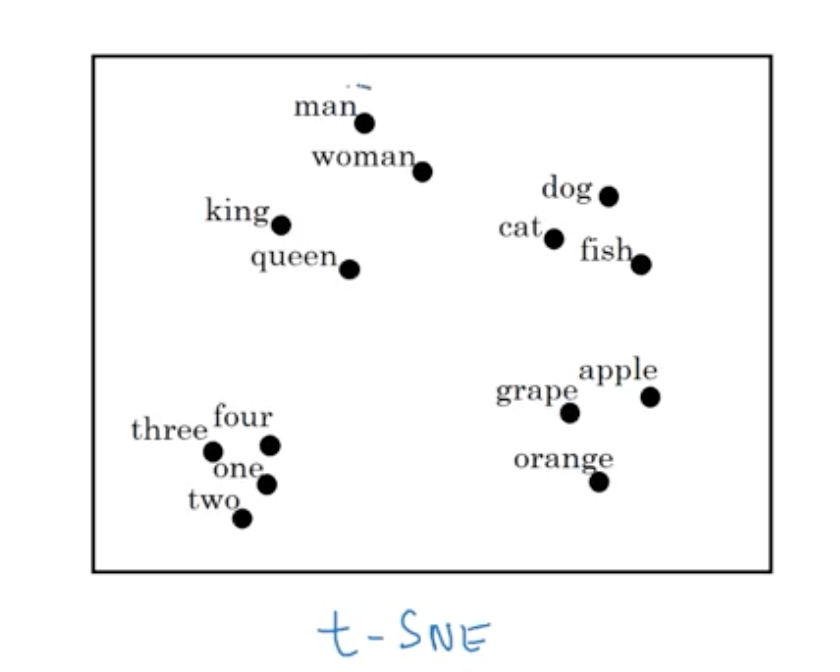


- Embeddings create analogies like, understanding that e_man - e_woman = e_king - e_?   
R: arm_max(sim(e_?, e_king - e_man + e_woman))  = e_queen



We can use the word embeddings to predict next words with a classifier (language model):

Example using the last 4 words as context:

" ... a glass of orange ? " -> predict juice

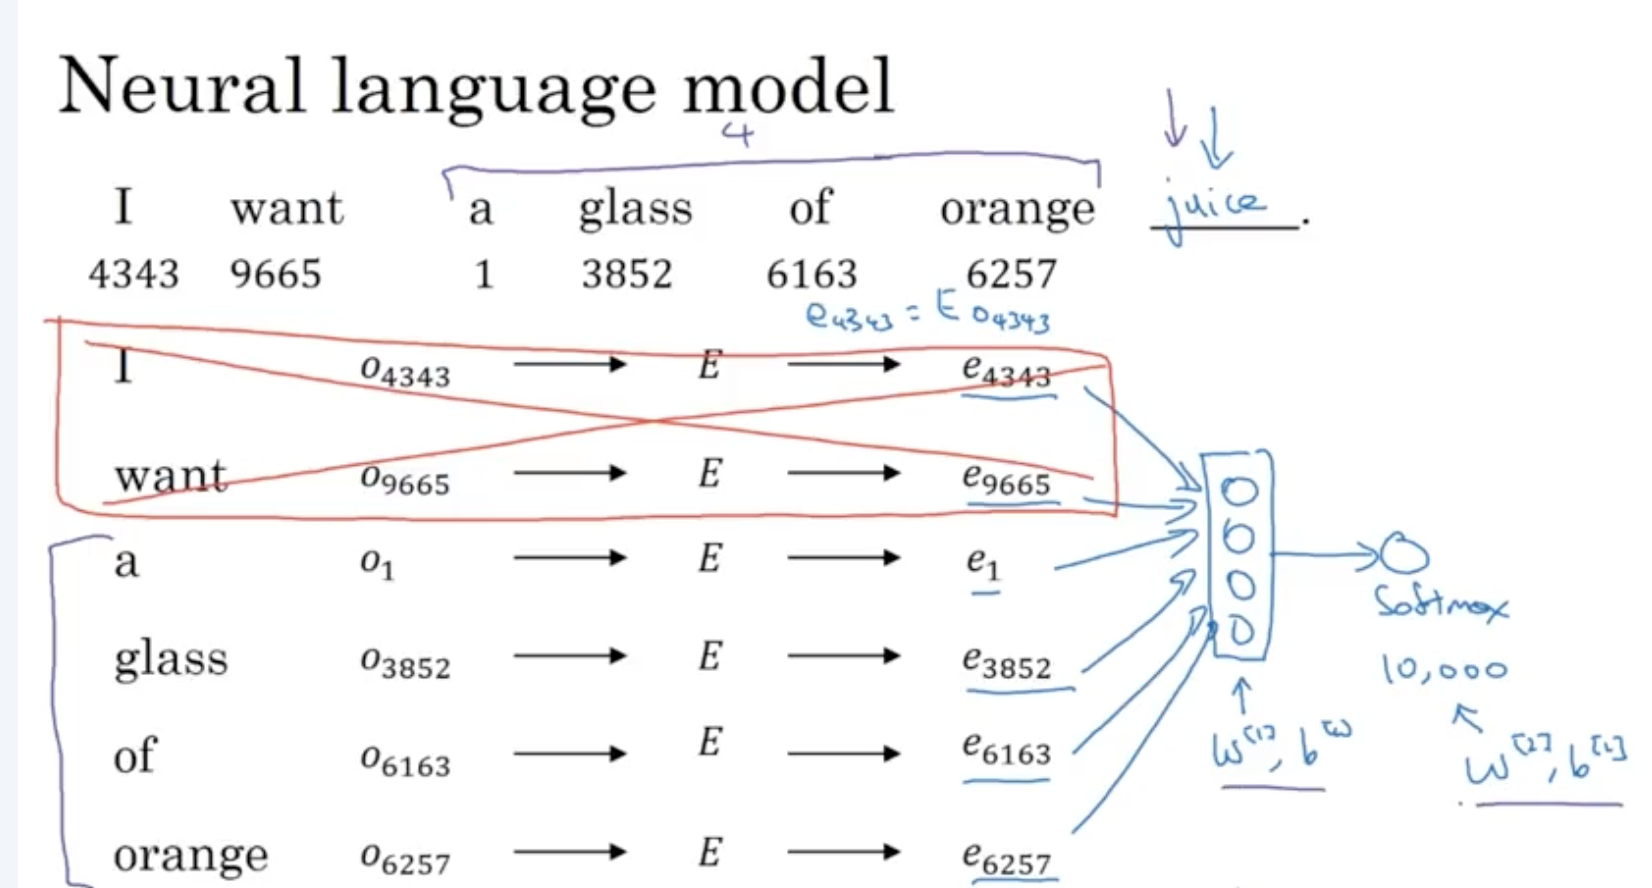


But if the task is not to create a language model, but rather learn embegginds, we can use other contexts:

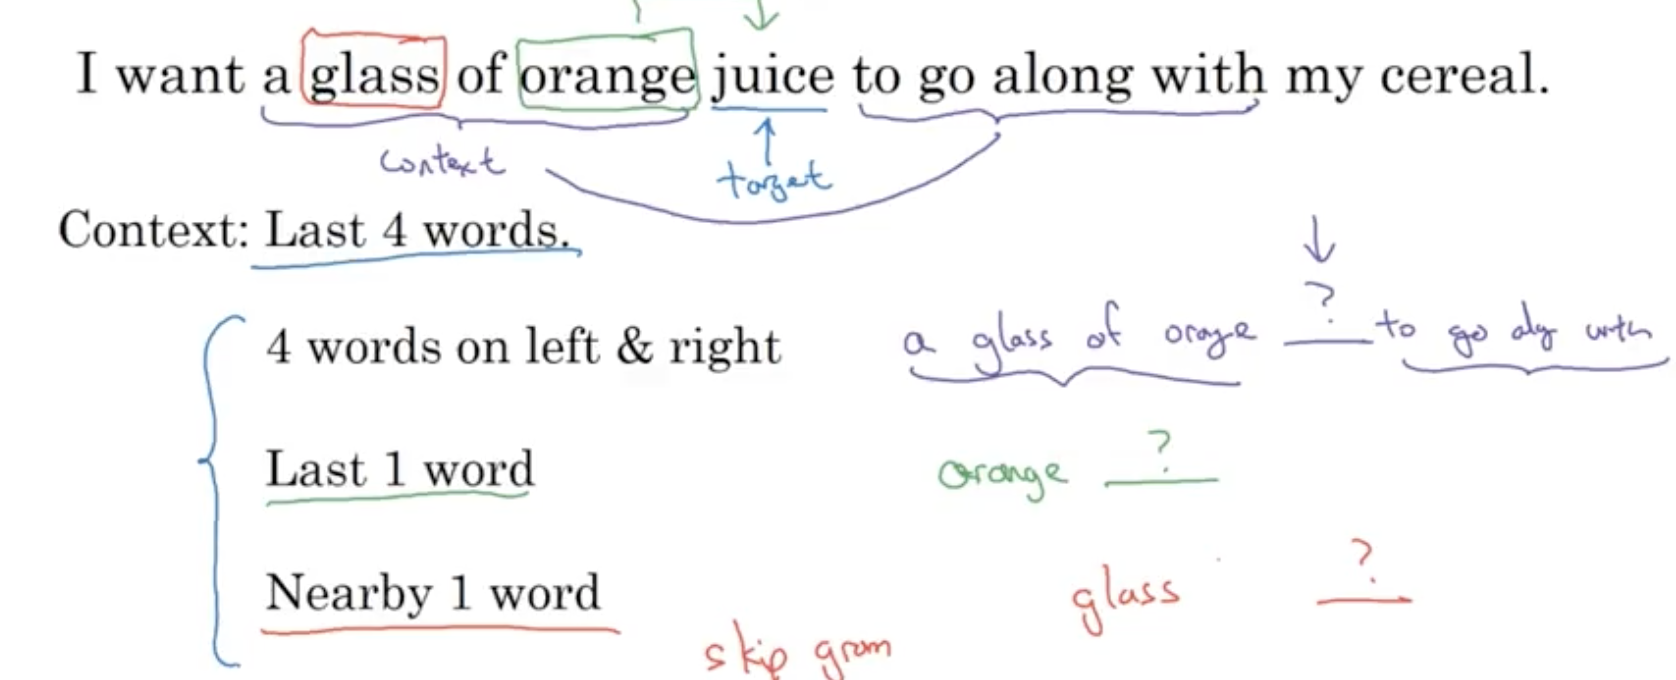

# Word2Vec – Learning Embeddings with Skip-grams

- Word2Vec uses the **Skip-gram** model instead of relying on the previous *n* words.
- Given a word in a sentence (the **center** or **target** word), Skip-gram tries to predict nearby  **context** words.

Sentence: "I want a glass of orange juice with my cereal"

- Center word: "orange"
- Possible context words: "juice", "glass", "cereal"

The model learns from these pairs, but the goal is **not** to predict context perfectly — the goal is to learn **useful word embeddings**.

### Creating (Center, Context) Pairs

- For each word, a sliding window is used to select context words.
- If context pairs are selected uniformly, **common words** appear more often and dominate training.

#### Heuristics to reduce frequency bias:
- **Subsampling**: Frequently occurring words are randomly dropped with higher probability.
- **Variable window size**: Randomly choose context window size to spread focus more evenly.

### Architecture

1. Represent the center word as a **one-hot vector**.
2. Multiply it by the **embedding matrix** \( E \) to get the word vector:  
   \( e_c = E \cdot o_c \)
3. Pass the result through a **softmax layer** to predict context word probabilities:  
   \( P(t \mid c) \)

### Problem: Efficiency

- Softmax layer to score every word in the vocabulary and pick the best match.
- Softmax requires computing probabilities over the **entire vocabulary**, which is expensive.


- **Hierarchical Softmax**:Uses a binary tree (often a Huffman tree). Frequent words get **shorter paths**, reducing computation.

- **Negative Sampling**: Instead of predicting all words, train the model to distinguish true context words from a small number of random (negative) samples.

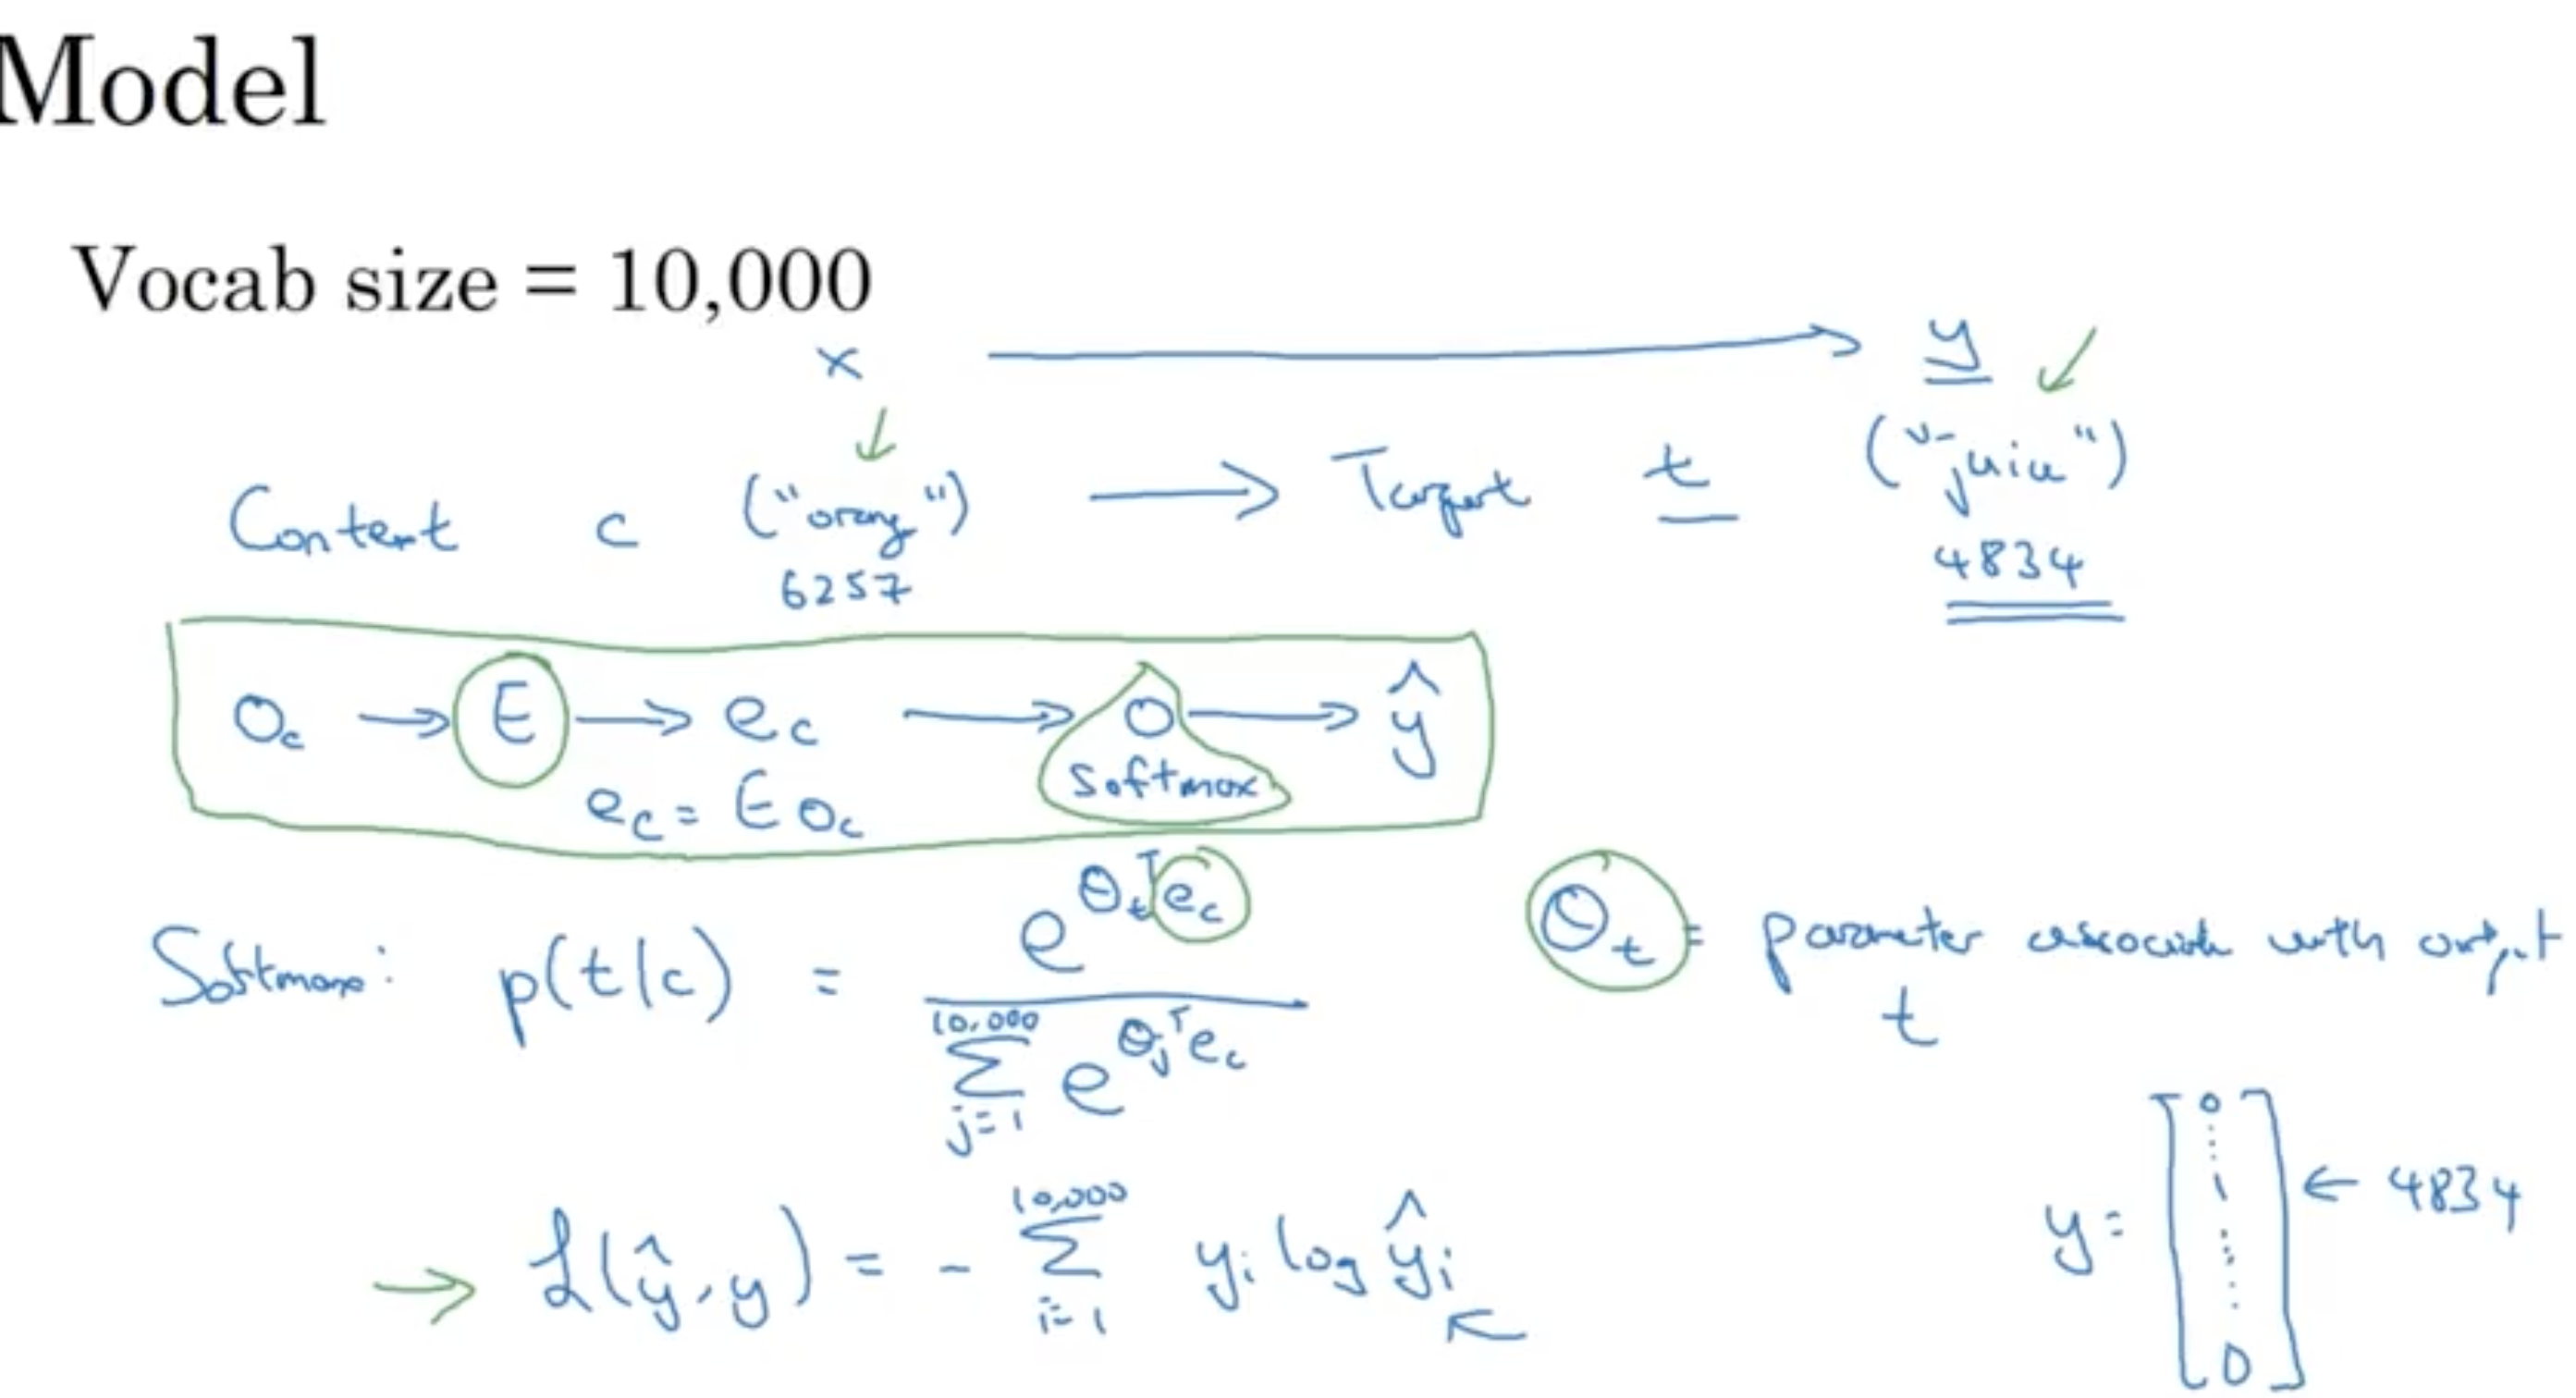

# Skip gram with Negative Sampling

- Create a new supervised learning problem
 Given two words: **Is (center, context) a real pair, or a noise (fake) pair?**

- How to create the dataset?
  1. find a true context-target pair (positive example), where the target is within the window
  2. create k negative example by choosing k words from the dictionary (k negative examples)
        - how to sample negative examples?
        - tradeoff between empirical distrubion from the corpus  (might endup with frequency bias/ uninformative words)
        - vs uniform sampling (might endup with many examples with rare words)

- orange, juice  = 1  (positive example)
- orage, king = 0 (negative example)
- orange, book = 0 
- orange, the = 0
- orange, of = 0

### Architecture: 
- Binary logistic classifiers for each word

Why is it efficient compared to word2vec?
    - Word2vec we are updating a 10000 softmax classifier, every training step
    - Here, we have 10000 binary logistic regression classifiers, but on each iteration we only train the positive and k negative examples

# GloVe - Global vectors for word representation

While Word2Vec is predictive (tries to predict context words), GloVe is count-based — it builds embeddings by looking at how often words appear together in a large text corpus.

The idea: **words occuring in similar contexts, should have similar vectors**

It learns matrix of co-occurence counts: how often each word appears with every other word in a context window

      | king| queen | apple | crown

king  | —   | 10    | 1     | 50

apple | 1   | 0     | —     | 0

crown | 20  | 15    | 0     | —

Glove solves **matrix factorization** with gradient descent. If finds two embeddings/vectors to approximate the log of their co-occurance.
Goal: make the dot product of the emddings of the two words close to the log of the co-occurance.

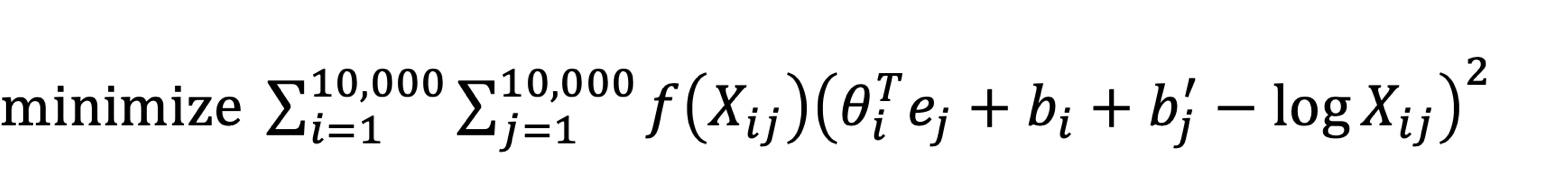

# Applications

## Sentiment classification

- " The dessert is excellent " -> 4/5

If we do not have a big training data, embeddings E, trained in a large dataset, can help improve accurary.

- Embeddings can be averaged and passed to a softmax unit. Problem? Ignores the order of the words. " lacking in good taste"

- Solution: Use an RNN for sentiment classificaiton (many to one)

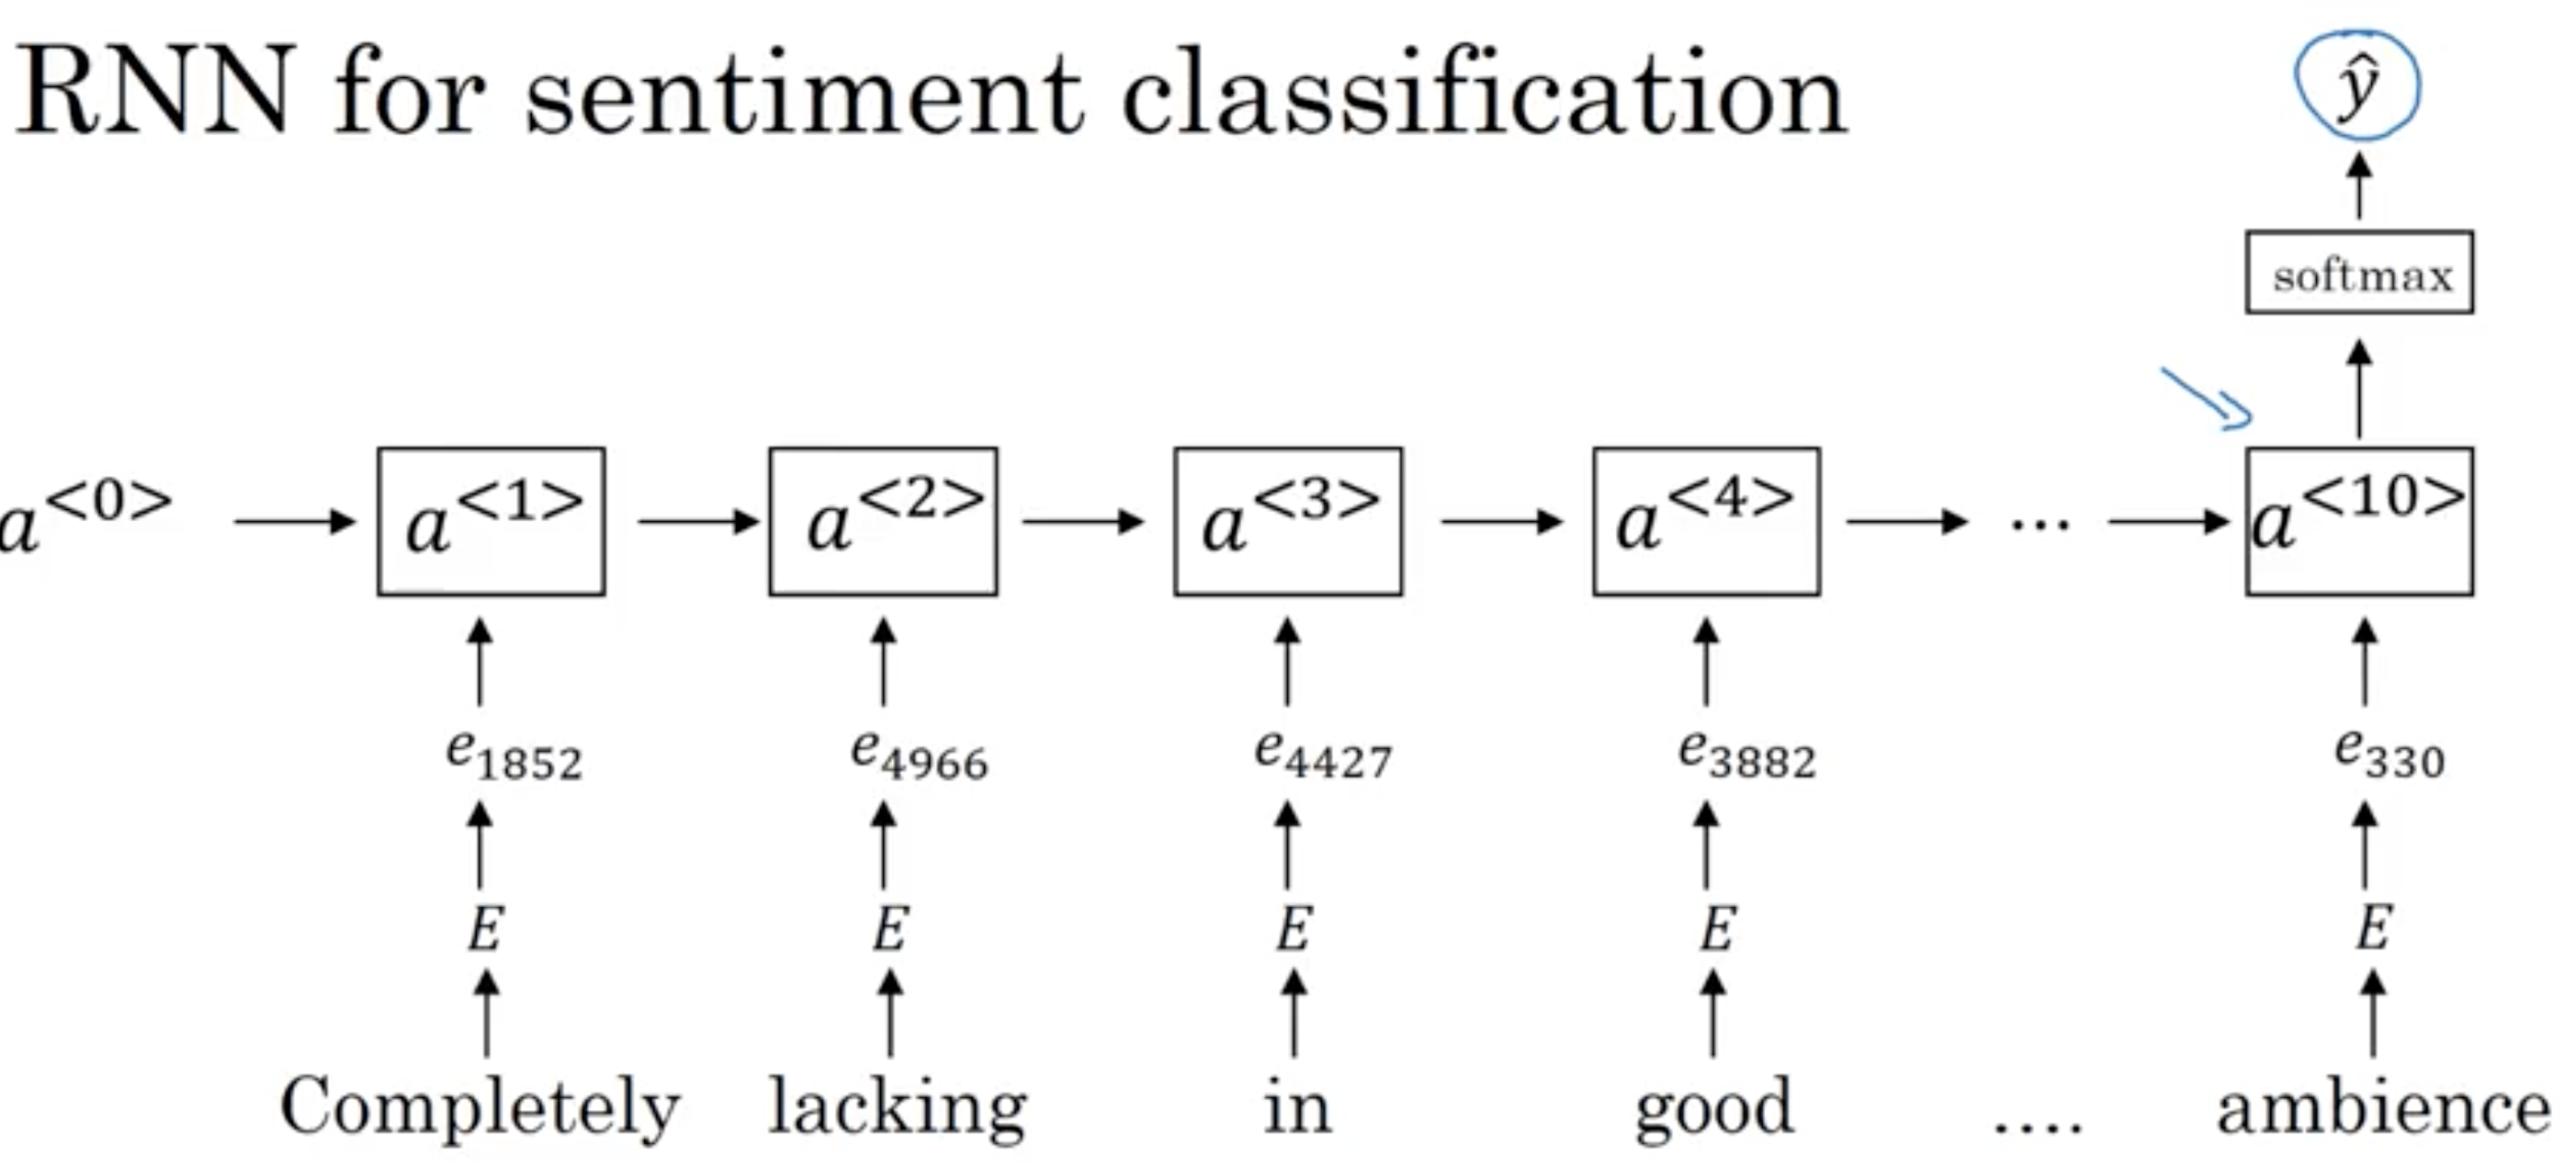


## Bias in Word Embeddings

Bias reflecting gender, age, ethnicity, sexual orientation etc

Man:Computer_Programmer as Woman:Homemaker   -> bias
Father:Doctor as Mother:Nuser         -> bias

How to reduce?
    1. Identify the bias direction. For instance, for gender bias we do  e_he - e_she; e_male - e_female and average, to find the direction in the embedding space
    2. Find every non definitional word (dont have a gender component like "doctor" "babysitter" that can be male or female), project to neutral bias direction.
    3. Equalize pairs (distance of babysitter to grandmother/grandmother should be tthe same)

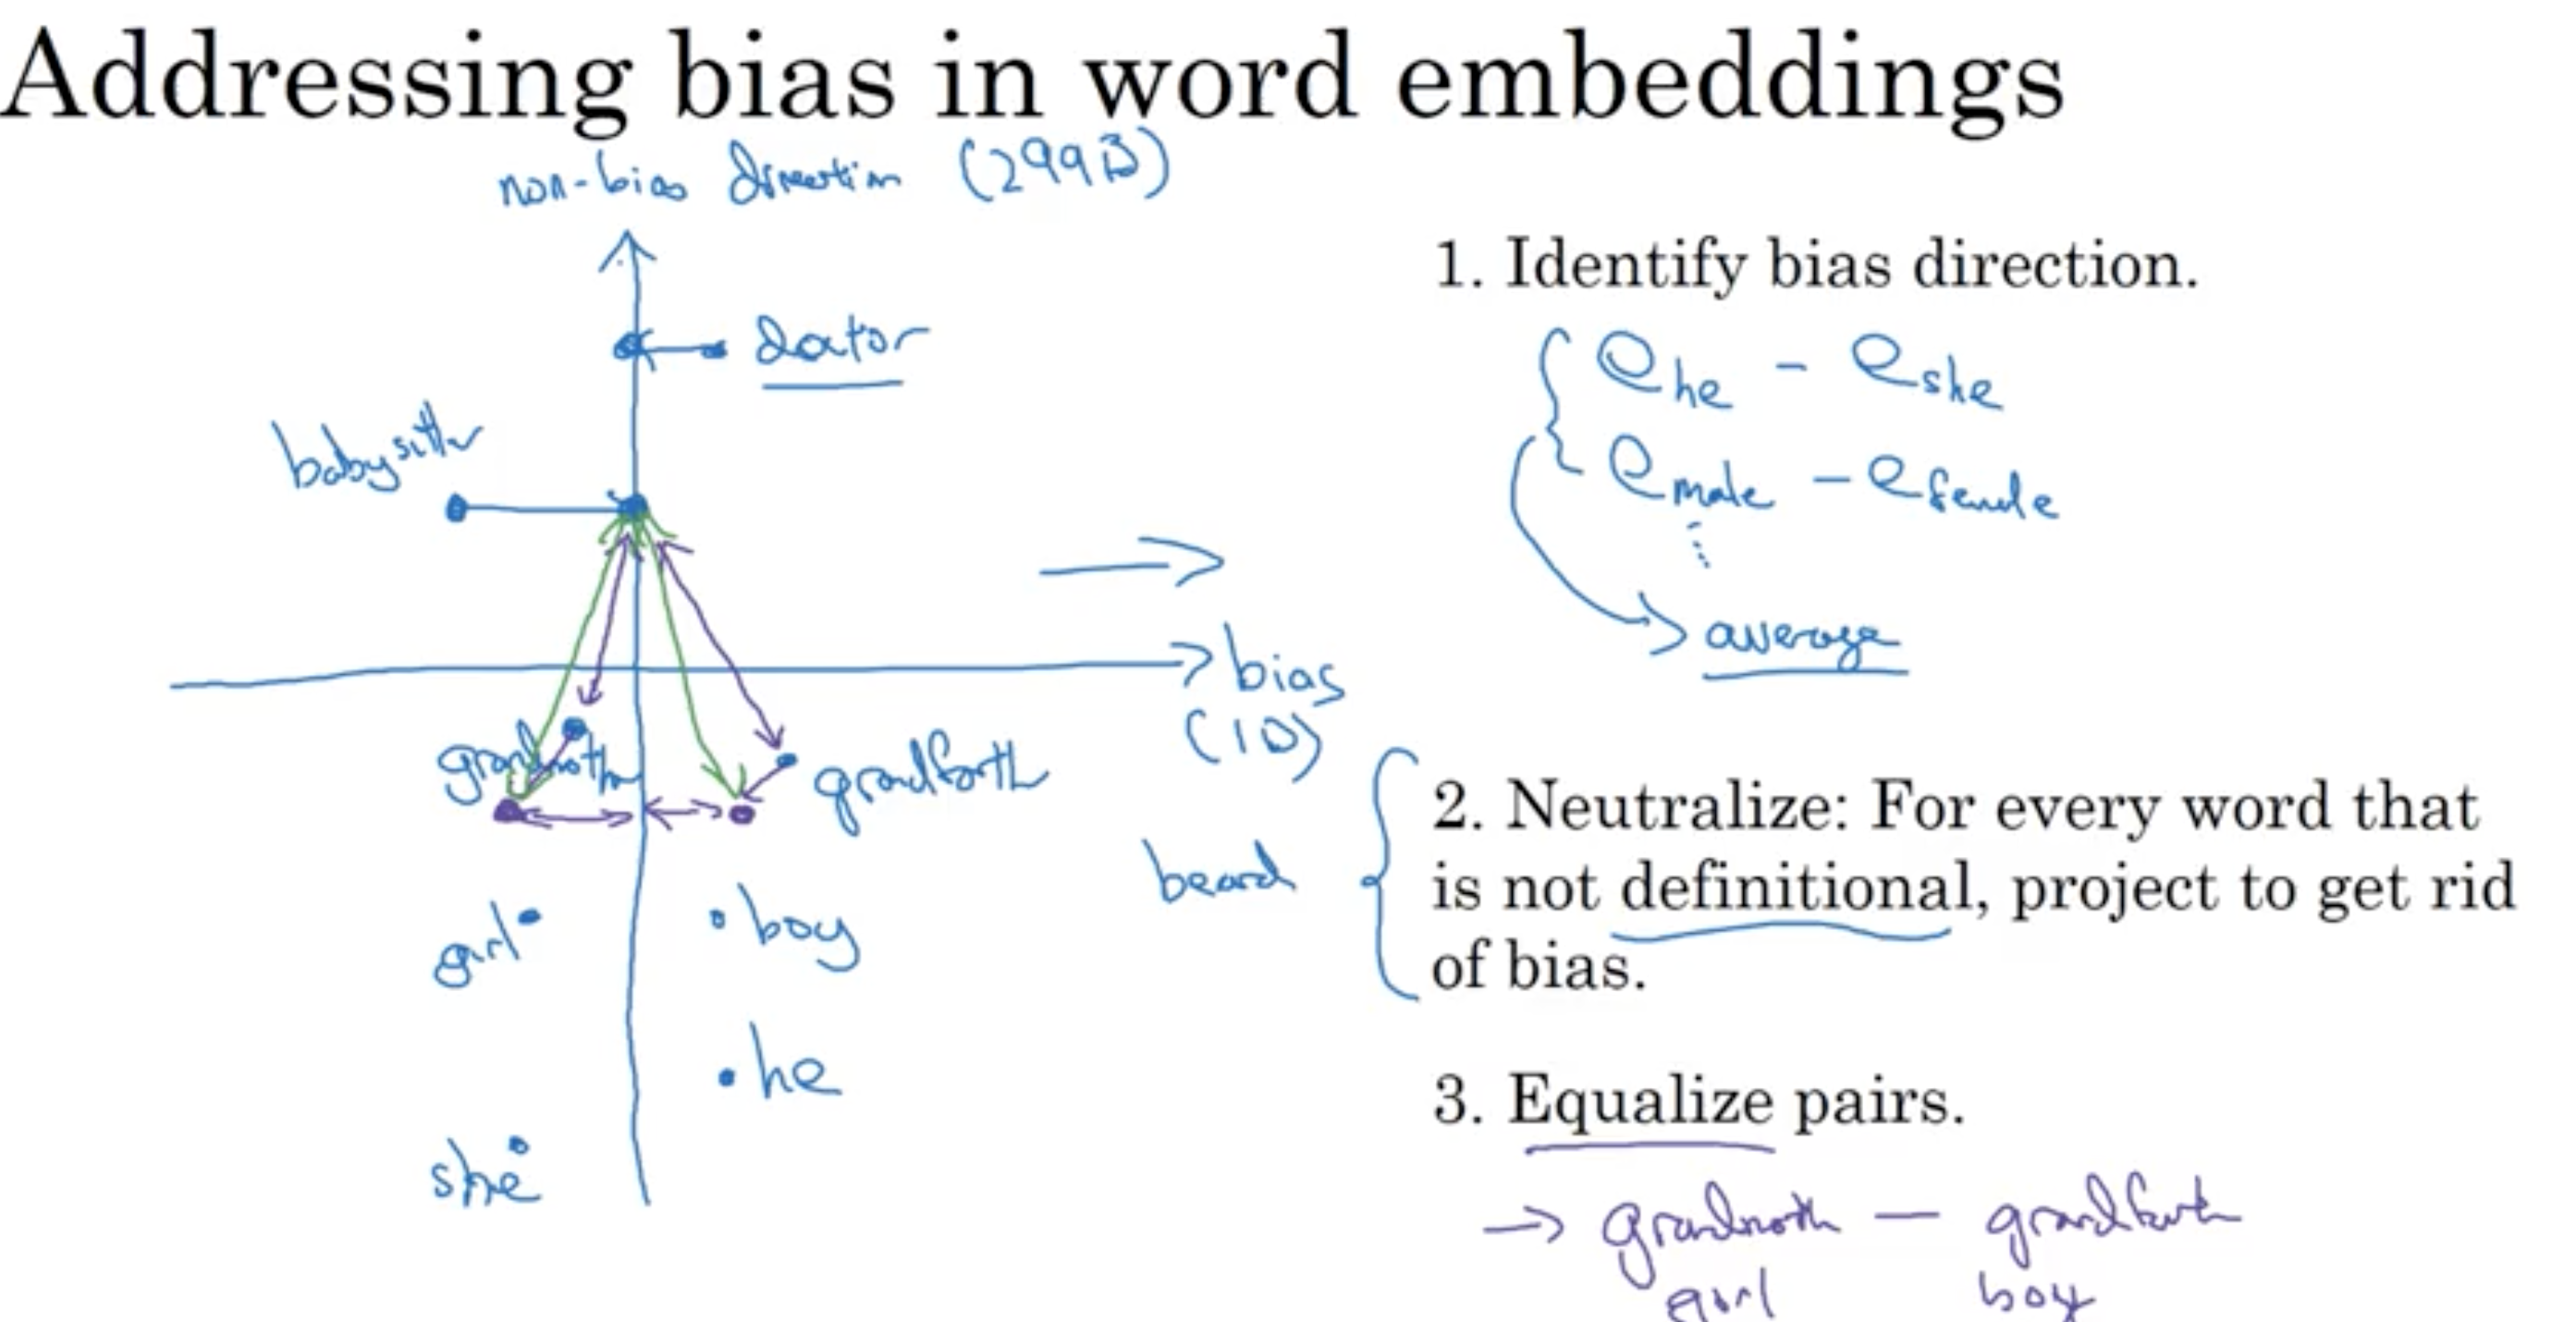





